In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Under standing of this data

In [2]:
df=pd.read_csv("HR_comma_sep.csv")

In [3]:
data=df.copy()

In [4]:
df.head(5)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [5]:
df.sample(5)

satisfaction_level  last_evaluation  number_project  \
5947                 0.67             0.57               3   
10157                0.22             0.61               4   
3129                 0.99             0.67               5   
13556                0.80             0.67               3   
2873                 0.77             0.93               5   

       average_montly_hours  time_spend_company  Work_accident  left  \
5947                    206                   3              1     0   
10157                   150                   6              0     0   
3129                    153                   2              0     0   
13556                   178                   3              0     0   
2873                    182                   4              0     0   

       promotion_last_5years   Department  salary  
5947                       0  product_mng  medium  
10157                      0   management  medium  
3129                       0        RandD     low  
13556                      0           IT     low  
2873                       0      support  medium

## summary

This dataset contains records of 14,999 employees across 10 features. 

It tracks satisfaction, performance, workload, tenure, accidents, promotions, department, salary, and whether an employee left the company.

***Shape***: 14,999 rows × 10 columns

Columns:

satisfaction_level – employee satisfaction (0–1, float)

last_evaluation – last performance score (0–1, float)

number_project – number of projects handled (int)

average_montly_hours – avg. monthly working hours (int)

time_spend_company – years spent in company (int)

Work_accident – whether employee had a work accident (0/1)

left – whether employee left the company (0 = stayed, 1 = left)

promotion_last_5years – promotion in last 5 years (0/1)

Department – department name (object, 10 unique depts.)

salary – salary level (low, medium, high)

In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [9]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
df.groupby('left')[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years']].mean()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  left  \
left                                                                  
0               199.060203            3.380032       0.175009   0.0   
1               207.419210            3.876505       0.047326   1.0   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321

## Univariate: 

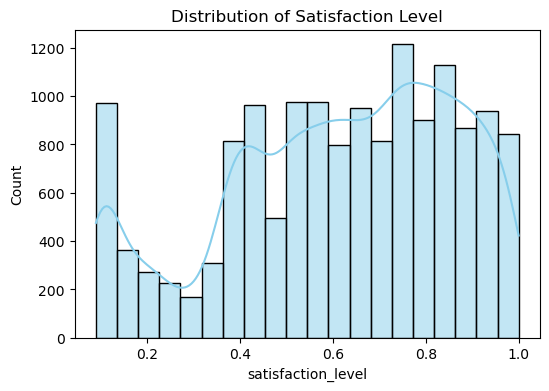

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df["satisfaction_level"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Satisfaction Level")
plt.show()

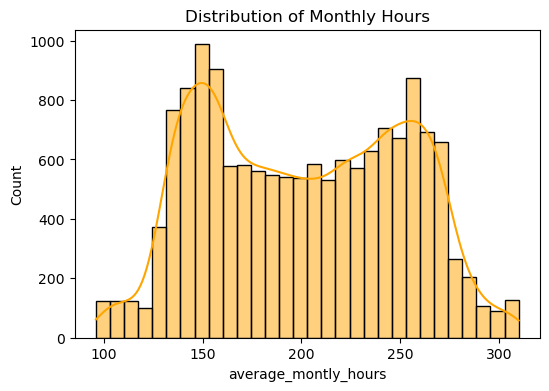

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df["average_montly_hours"], bins=30, kde=True, color="orange")
plt.title("Distribution of Monthly Hours")
plt.show()

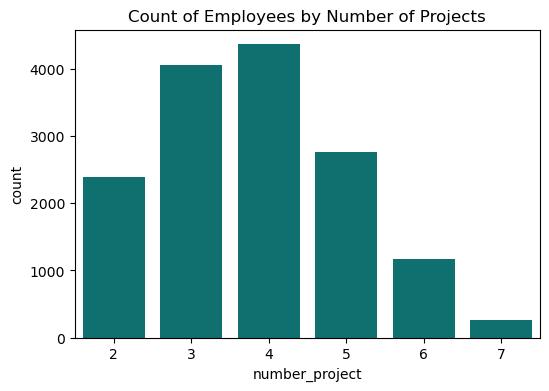

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="number_project", color="teal")
plt.title("Count of Employees by Number of Projects")
plt.show()

In [14]:
##majority handle 3–4 projects

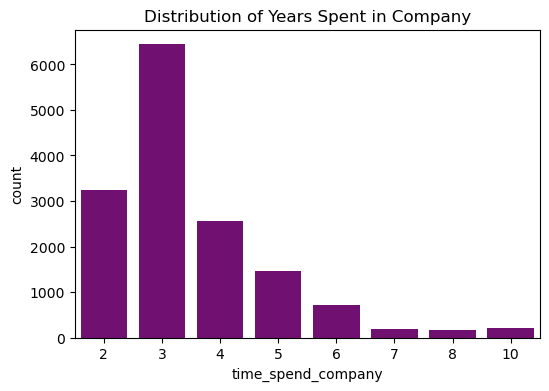

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="time_spend_company", color="purple")
plt.title("Distribution of Years Spent in Company")
plt.show()

In [16]:
attrition_rate = df["left"].value_counts(normalize=True) * 100
attrition_rate

left
0    76.191746
1    23.808254
Name: proportion, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14748\2614182891.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette="Set2")


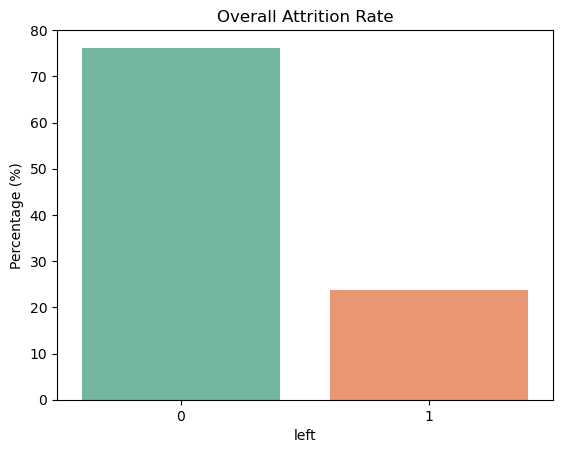

In [17]:

sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette="Set2")
plt.title("Overall Attrition Rate")
plt.ylabel("Percentage (%)")
plt.show()

## insight
- ~24% of employees have left.

In [18]:
dept_left = df[df["left"] == 1].groupby("Department")["left"].count().sort_values(ascending=False)

In [19]:
dept_left

Department
sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: left, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14748\2174639698.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_left.index, y=dept_left.values, palette="viridis")


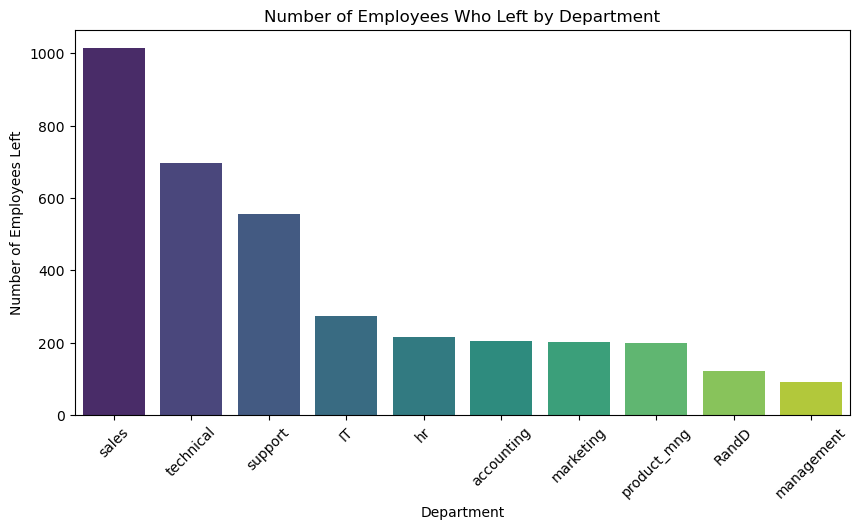

In [20]:
# Visualization
plt.figure(figsize=(10,5))
sns.barplot(x=dept_left.index, y=dept_left.values, palette="viridis")
plt.title("Number of Employees Who Left by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees Left")
plt.xticks(rotation=45)
plt.show()

In [21]:
## most employee left by sales depaertment

In [22]:
dept_counts = df.groupby("Department")["left"].sum().sort_values(ascending=False)

# ---- Percentages ----
dept_total = df.groupby("Department")["left"].count()
dept_pct = (dept_counts / dept_total * 100).sort_values(ascending=False)

In [23]:
dept_counts

Department
sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: left, dtype: int64

In [24]:
dept_total

Department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: left, dtype: int64

In [25]:
dept_pct

Department
hr             29.093369
accounting     26.597132
technical      25.625000
support        24.899058
sales          24.492754
marketing      23.659674
IT             22.249389
product_mng    21.951220
RandD          15.374841
management     14.444444
Name: left, dtype: float64

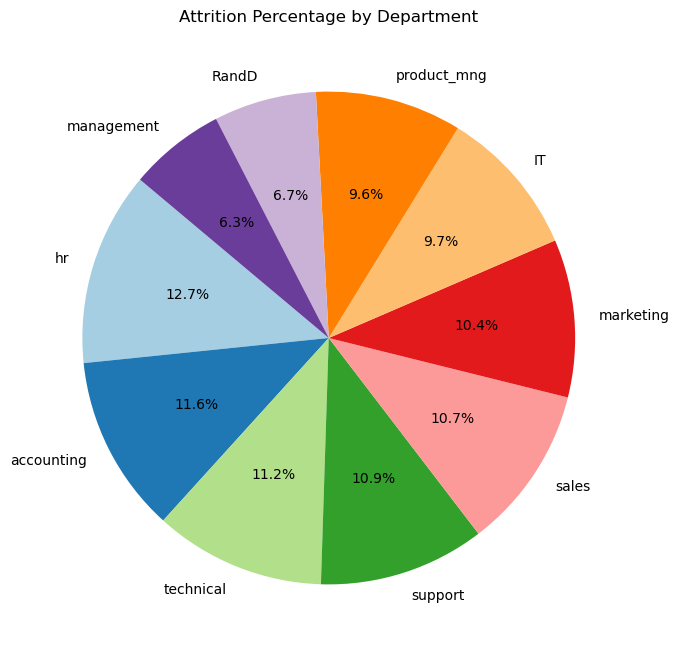

In [26]:
# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(
    dept_pct.values,
    labels=dept_pct.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Attrition Percentage by Department")
plt.show()

## insight

- Departments like HR (12.7%), Accounting (11.6%), and Technical (11.2%) show above-average attrition.
- Management (6.3%) and R&D (6.7%) have the lowest attrition, suggesting stronger retention.


## Bivariate: Satisfaction vs Attrition

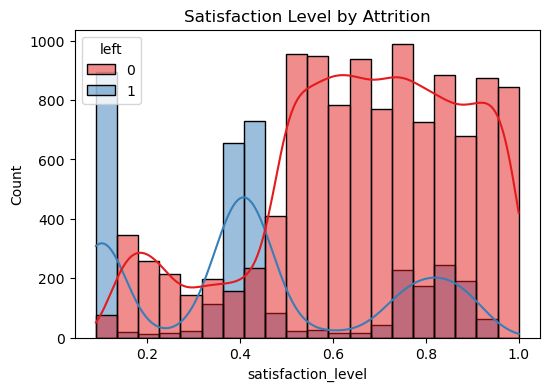

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="satisfaction_level", hue="left", bins=20, kde=True, palette="Set1")
plt.title("Satisfaction Level by Attrition")
plt.show()

## insight

- Employees who left the company blue are heavily concentrated in the low satisfaction range (around 0.1 to 0.5).
- Employees who stayed  red show a broader distribution, with a peak around 0.7 to 0.9.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14748\1305641358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="left", y="average_montly_hours", palette="Set2")


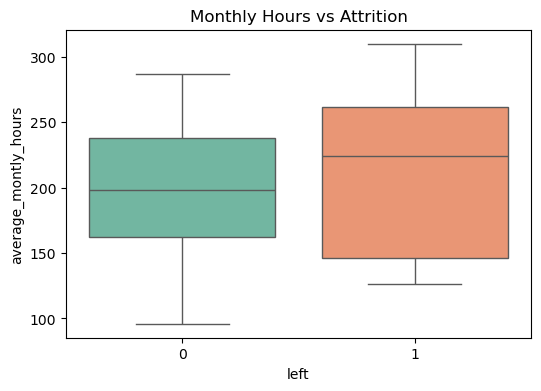

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="left", y="average_montly_hours", palette="Set2")
plt.title("Monthly Hours vs Attrition")
plt.show()


*******Insight****

- Median monthly hours for employees who left is ~220, higher than the ~200 for those who stayed.
- The upper quartile for leavers stretches beyond 280 hours, suggesting that overworked employees are more likely to quit.


In [29]:
df["new_feature"]= pd.cut(df["average_montly_hours"], bins=[0, 150, 200, 250, 300], labels=['low', 'moderate', 'high', 'extreme'])

In [30]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary new_feature  
0     low    moderate  
1  medium     extreme  
2  medium     extreme  
3     low        high  
4     low    moderate

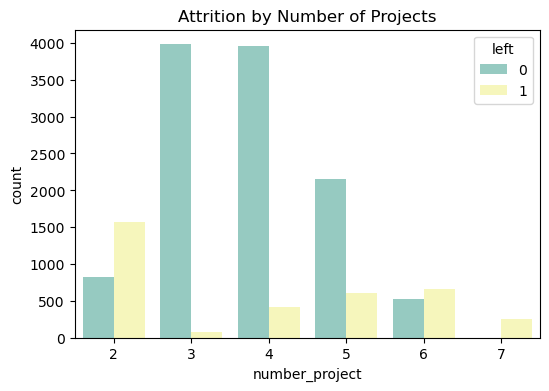

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="number_project", hue="left", palette="Set3")
plt.title("Attrition by Number of Projects")
plt.show()

In [32]:
##too few (2) or too many (>6) projects → higher attrition.

## Projects & Hours vs Attrition 

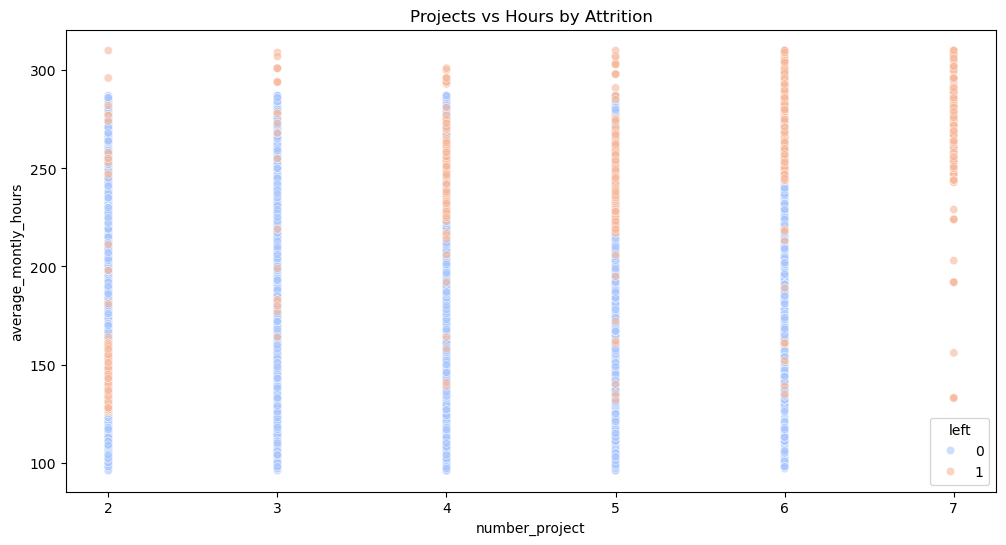

In [33]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df, x="number_project", y="average_montly_hours", hue="left", palette="coolwarm", alpha=0.6
)
plt.title("Projects vs Hours by Attrition")
plt.show()

## insight
- A few employees with 2–3 projects but high hours still left.
- This could signal inefficient task allocation, poor role fit, or lack of recognition.ke it actionable.


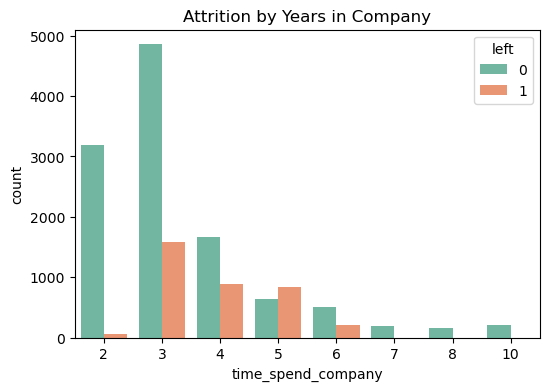

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="time_spend_company", hue="left", palette="Set2")
plt.title("Attrition by Years in Company")
plt.show()

## Salary vs Attrition

In [35]:
salary_attrition = pd.crosstab(df["salary"], df["left"], normalize="index") * 100
salary_attrition 

left            0          1
salary                      
high    93.371059   6.628941
low     70.311646  29.688354
medium  79.568725  20.431275

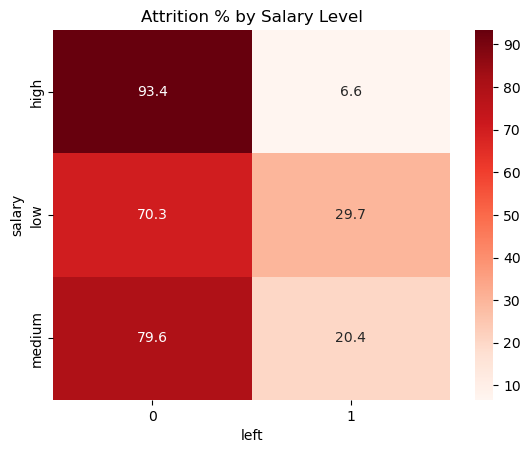

In [36]:

sns.heatmap(salary_attrition, annot=True, fmt=".1f", cmap="Reds")
plt.title("Attrition % by Salary Level")
plt.show()

In [37]:
depart_attrition = pd.crosstab(df["Department"], df["left"], normalize="index") * 100
depart_attrition 

left                 0          1
Department                       
IT           77.750611  22.249389
RandD        84.625159  15.374841
accounting   73.402868  26.597132
hr           70.906631  29.093369
management   85.555556  14.444444
marketing    76.340326  23.659674
product_mng  78.048780  21.951220
sales        75.507246  24.492754
support      75.100942  24.899058
technical    74.375000  25.625000

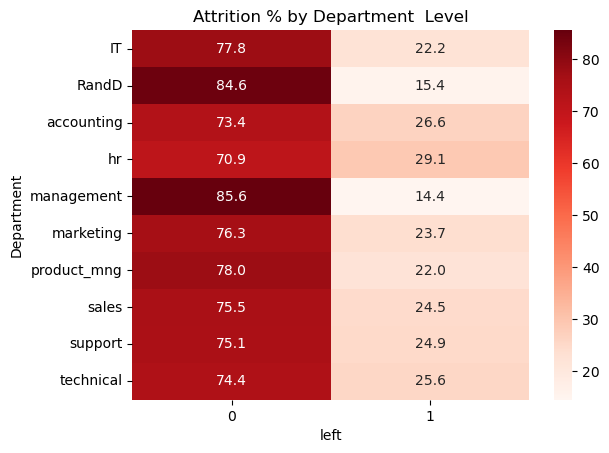

In [38]:
sns.heatmap(depart_attrition, annot=True, fmt=".1f", cmap="Reds")
plt.title("Attrition % by Department  Level")
plt.show()

 low-salary employees leave more.
 
👉 Business Insight: If low salary group shows much higher attrition %, HR should consider salary adjustments.

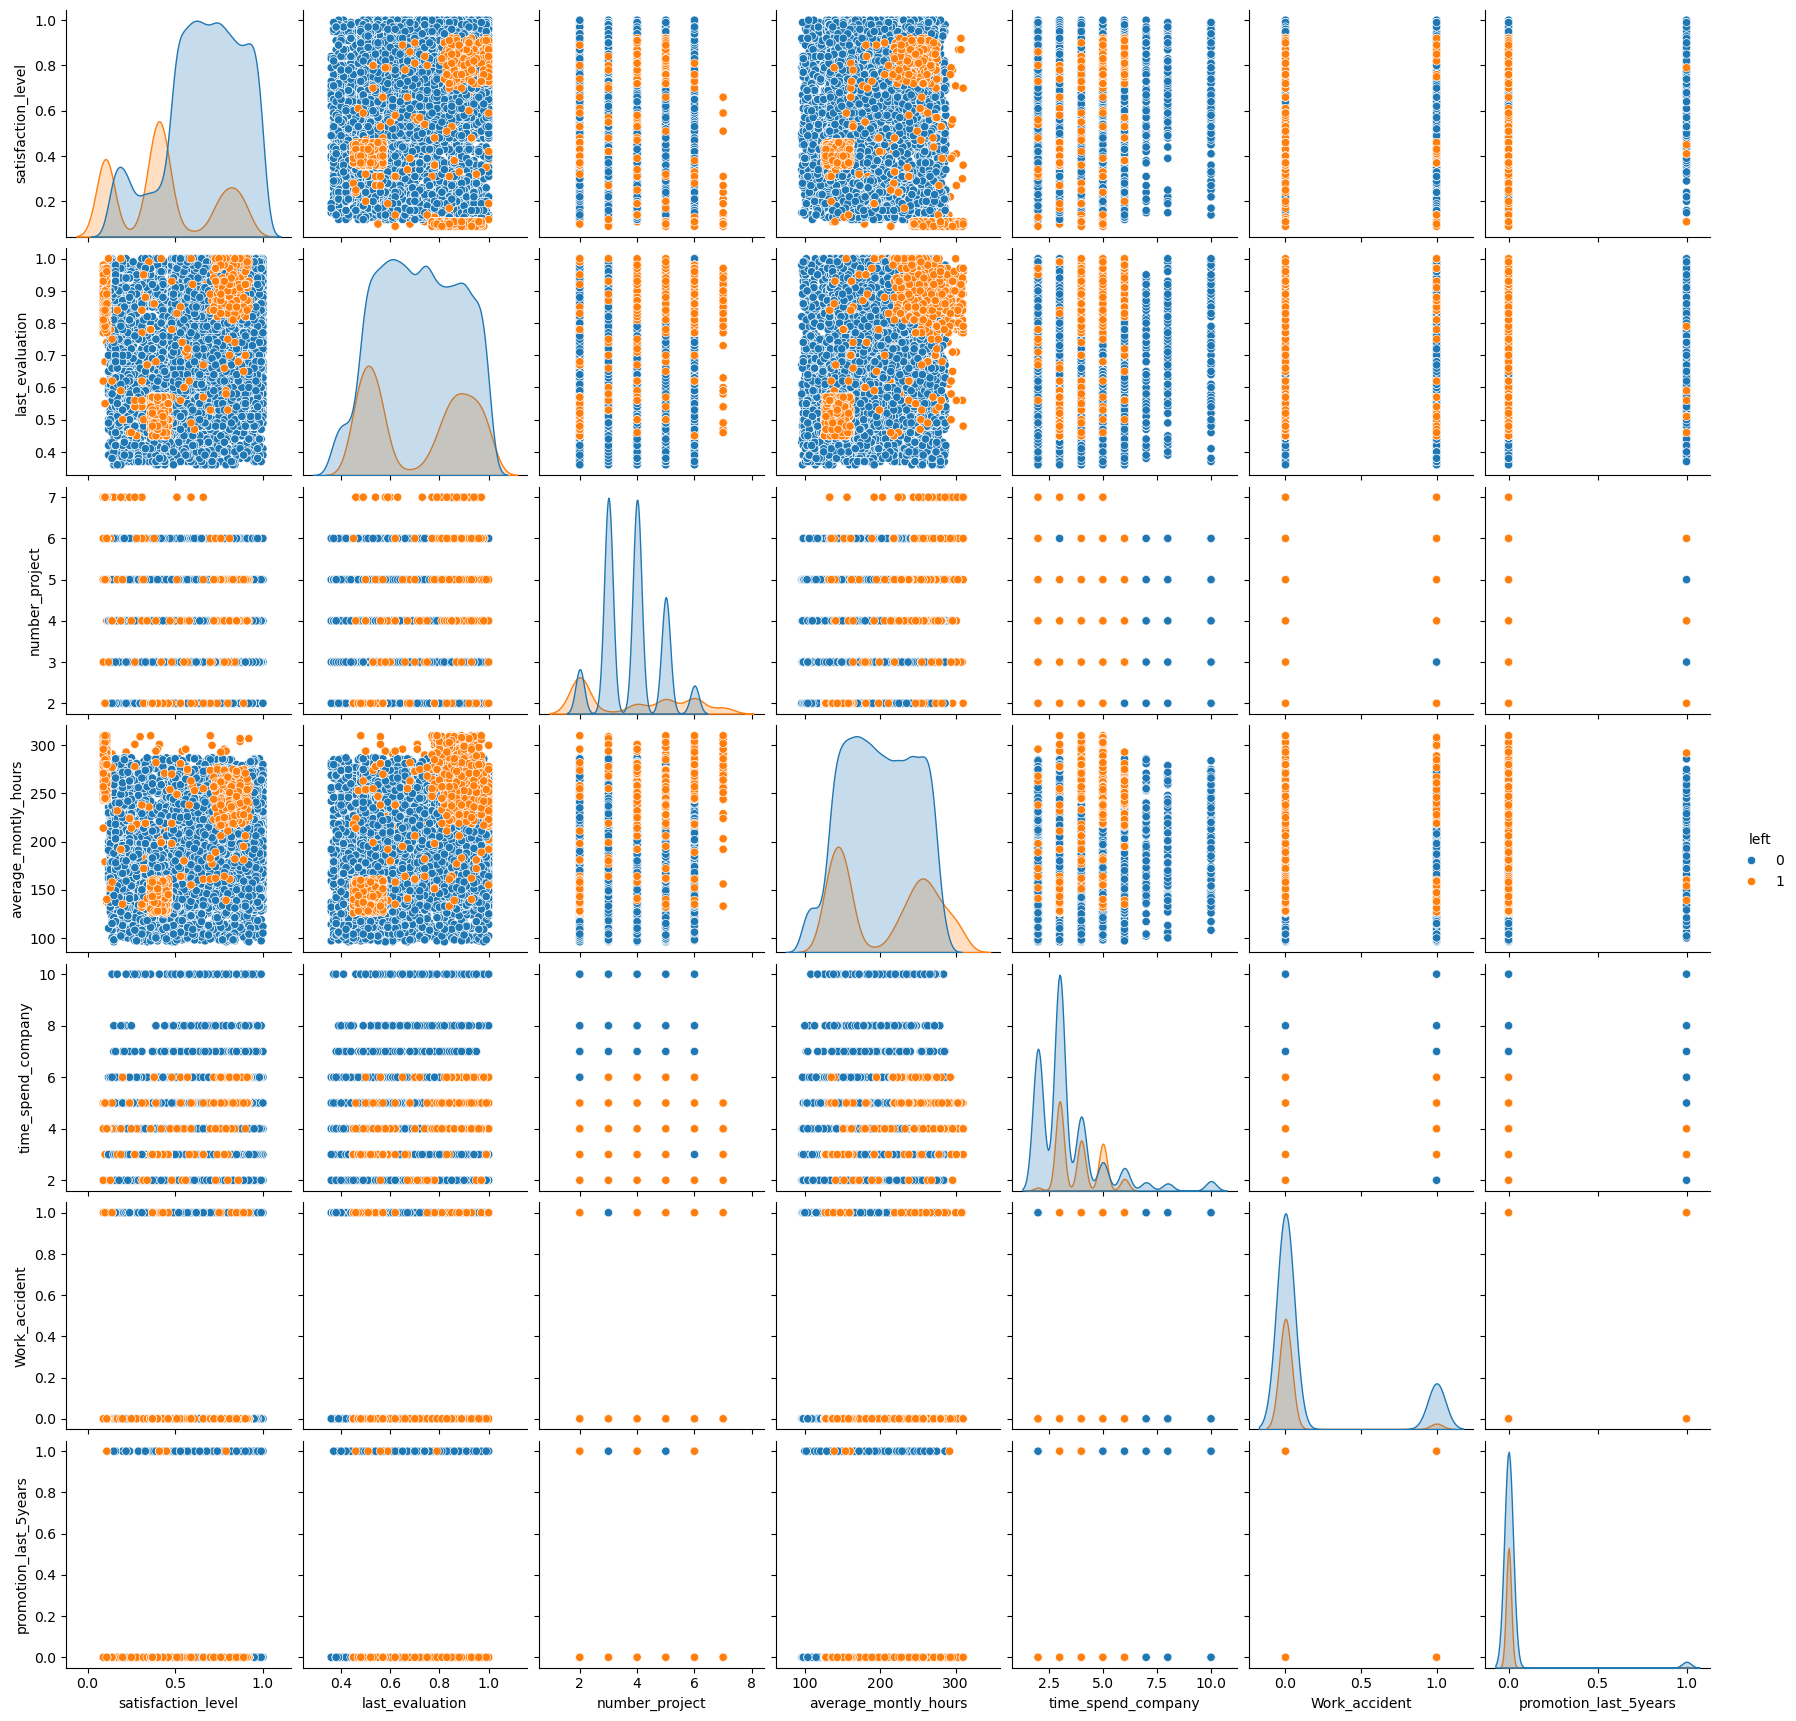

In [39]:
sns.pairplot(data=df,hue='left')

In [40]:
# Promotion x Department x Attrition (heatmap version)
pivot = pd.pivot_table(
    df, 
    index="Department", 
    columns=["promotion_last_5years", "left"], 
    values="satisfaction_level", 
    aggfunc="count"
)


In [41]:
pivot

promotion_last_5years       0             1     
left                        0       1     0    1
Department                                      
IT                      954.0   270.0   NaN  3.0
RandD                   639.0   121.0  27.0  NaN
accounting              549.0   204.0  14.0  NaN
hr                      509.0   215.0  15.0  NaN
management              473.0    88.0  66.0  3.0
marketing               612.0   203.0  43.0  NaN
product_mng             704.0   198.0   NaN  NaN
sales                  3033.0  1007.0  93.0  7.0
support                1657.0   552.0  17.0  3.0
technical              1998.0   694.0  25.0  3.0

In [42]:
## 0 → No promotion in the last 5 years.

## 1 → Got promoted in the last 5 years.


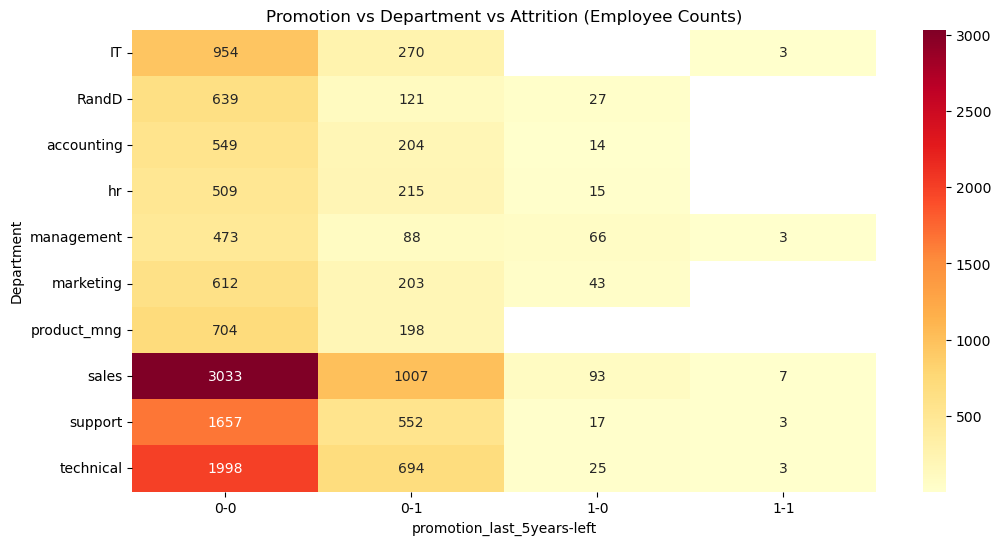

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Promotion vs Department vs Attrition (Employee Counts)")
plt.show()

## insight

- Across departments, the majority of employees who left had no promotion in the last 5 years.
- Example: In IT, 270 employees left without promotion, but only 3 left after being promoted.
- This pattern repeats in sales, technical, support, and HR.
- This suggests that employees who don’t get promoted are far more likely to leave, especially in high-volume departments.



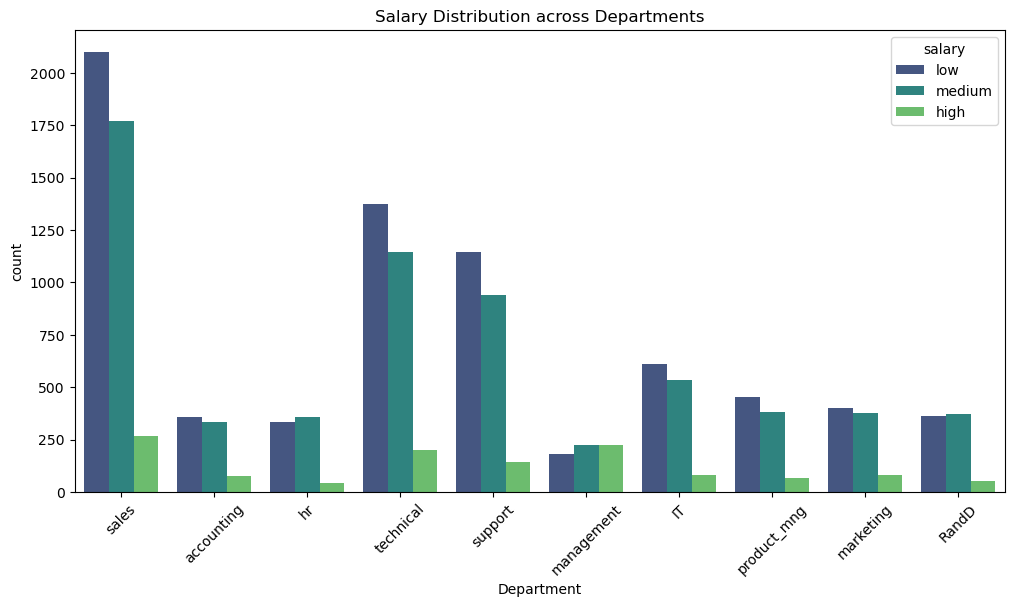

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Department", hue="salary", palette="viridis")
plt.title("Salary Distribution across Departments")
plt.xticks(rotation=45)
plt.show()

### ML model for Imbalanced Data

In [45]:
## encoding:- 

In [46]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary new_feature  
0     low    moderate  
1  medium     extreme  
2  medium     extreme  
3     low        high  
4     low    moderate

In [47]:
df.drop(columns=["new_feature"],inplace=True)

In [48]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [49]:
## here we have 2 columns are categorigal data so we need to convert into numerical 
##- salary :- its follows orinal encoding
##- Department :- its follow one hot enocing


In [50]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [51]:
from sklearn.preprocessing import OrdinalEncoder

ord_data=[['low', 'medium', 'high']]
# Define order explicitly
encoder = OrdinalEncoder(categories=[['Small', 'Medium', 'Large']])
oe=OrdinalEncoder(categories=ord_data)
df['salary'] = oe.fit_transform(df[['salary']])

In [52]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     0.0  
1     1.0  
2     1.0  
3     0.0  
4     0.0

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  float64
dtypes: float64(3), int64(6), object(1)
memory usage: 1.1+ MB


In [54]:
df['salary'] = df['salary'].astype(np.int64)


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [56]:
## now we perfom 
en_data1=df["Department"]
en_data1

0          sales
1          sales
2          sales
3          sales
4          sales
          ...   
14994    support
14995    support
14996    support
14997    support
14998    support
Name: Department, Length: 14999, dtype: object

In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Department'] = le.fit_transform(df[['Department']])


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  Department  \
0                   3              0     1                      0           7   
1                   6              0     1                      0           7   
2                   4              0     1                      0           7   
3                   5              0     1                      0           7   
4                   3              0     1                      0           7   

   salary  
0       0  
1       1  
2       1  
3       0  
4       0

In [59]:
df["Department"].unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

In [60]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  Department  \
0                   3              0     1                      0           7   
1                   6              0     1                      0           7   
2                   4              0     1                      0           7   
3                   5              0     1                      0           7   
4                   3              0     1                      0           7   

   salary  
0       0  
1       1  
2       1  
3       0  
4       0

## Correlation of matrix

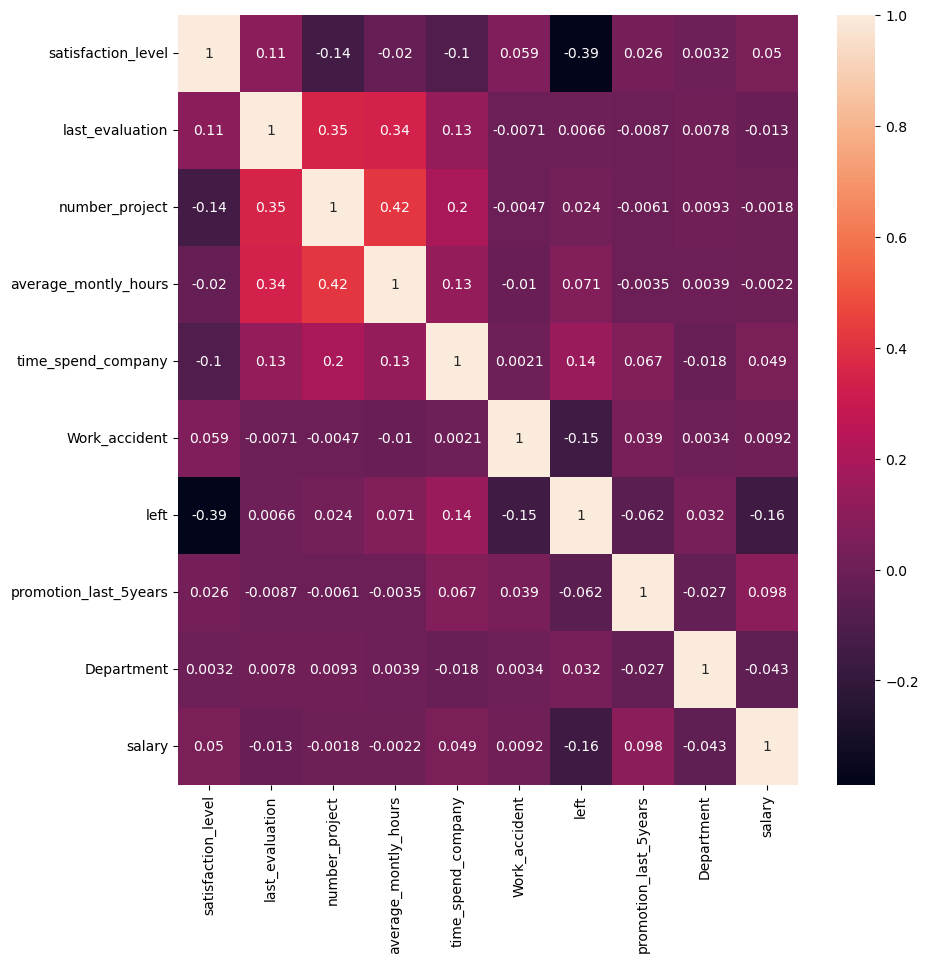

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [62]:
x=df.drop(columns=["left"])

In [63]:
y=df["left"]

In [64]:
x

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
14994                   151                   3              0   
14995                   160                   3              0   
14996                   143                   3              0   
14997                   280                   4              0   
14998                   158                   3              0   

       promotion_last_5years  Department  salary  
0                          0           7       0  
1                          0           7       1  
2                          0           7       1  
3                          0           7       0  
4                          0           7       0  
...                      ...         ...     ...  
14994                      0           8       0  
14995                      0           8       0  
14996                      0           8       0  
14997                      0           8       0  
14998                      0           8       0  

[14999 rows x 9 columns]

## Train Test split

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

## Scalling

In [66]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(X_train)
x_test_scaled=scalar.fit_transform(X_test)

In [67]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x.columns)

In [68]:
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x.columns)

In [69]:
print(f"x_train: {X_train.shape}, x_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")


x_train: (11999, 9), x_test: (3000, 9), y_train: (11999,), y_test: (3000,)


## Model 

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [71]:
# Initialize models
lr_model = LogisticRegression(random_state=42)
svc_model=SVC(kernel='rbf', C=1.0, gamma='scale')
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42, learning_rate=0.1)
xgb_model = XGBClassifier(random_state=42, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')


In [72]:
# Train models
lr_model.fit(x_train_scaled, y_train)
rf_model.fit(x_train_scaled, y_train)
dt_model.fit(x_train_scaled, y_train)
gb_model.fit(x_train_scaled, y_train)
xgb_model.fit(x_train_scaled, y_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:43:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_classifier(model, x_test, y_test):
    y_pred = model.predict(x_test_scaled)
    return {
        'Train Score': model.score(x_train_scaled, y_train), 

        'Test Score': model.score(x_test_scaled, y_test),     
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='binary'),
        'Recall': recall_score(y_test, y_pred, average='binary'),
        'F1 Score': f1_score(y_test, y_pred, average='binary'),

        'Confusion Matrix': confusion_matrix(y_test, y_pred).tolist()  
    }


In [74]:
lr_results = evaluate_classifier(lr_model, x_test_scaled, y_test)
dt_results=  evaluate_classifier(dt_model, x_test_scaled, y_test)
rf_results = evaluate_classifier(rf_model, x_test_scaled, y_test)
gb_results=  evaluate_classifier(gb_model, x_test_scaled, y_test)
xgb_reults=  evaluate_classifier(xgb_model, x_test_scaled, y_test)
print("Logistic Regression:")
print(lr_results)
print()
print()
print("Decision Tree :")
print( dt_results)
print()
print()
print("Random Forest:")
print( rf_results)
print()
print()
print("Gradient Boosting:")
print( gb_results)
print()
print("XGBoost :")
print( xgb_reults)

Logistic Regression:
{'Train Score': 0.7934827902325193, 'Test Score': 0.7836666666666666, 'Accuracy': 0.7836666666666666, 'Precision': 0.5717884130982368, 'Recall': 0.32152974504249293, 'F1 Score': 0.41160471441523117, 'Confusion Matrix': [[2124, 170], [479, 227]]}


Decision Tree :
{'Train Score': 0.9767480623385282, 'Test Score': 0.9716666666666667, 'Accuracy': 0.9716666666666667, 'Precision': 0.9546120058565154, 'Recall': 0.9235127478753541, 'F1 Score': 0.9388048956083513, 'Confusion Matrix': [[2263, 31], [54, 652]]}


Random Forest:
{'Train Score': 0.9999166597216435, 'Test Score': 0.9886666666666667, 'Accuracy': 0.9886666666666667, 'Precision': 0.9883720930232558, 'Recall': 0.9631728045325779, 'F1 Score': 0.975609756097561, 'Confusion Matrix': [[2286, 8], [26, 680]]}


Gradient Boosting:
{'Train Score': 0.9780815067922327, 'Test Score': 0.9746666666666667, 'Accuracy': 0.9746666666666667, 'Precision': 0.9659763313609467, 'Recall': 0.9249291784702549, 'F1 Score': 0.9450072358900145

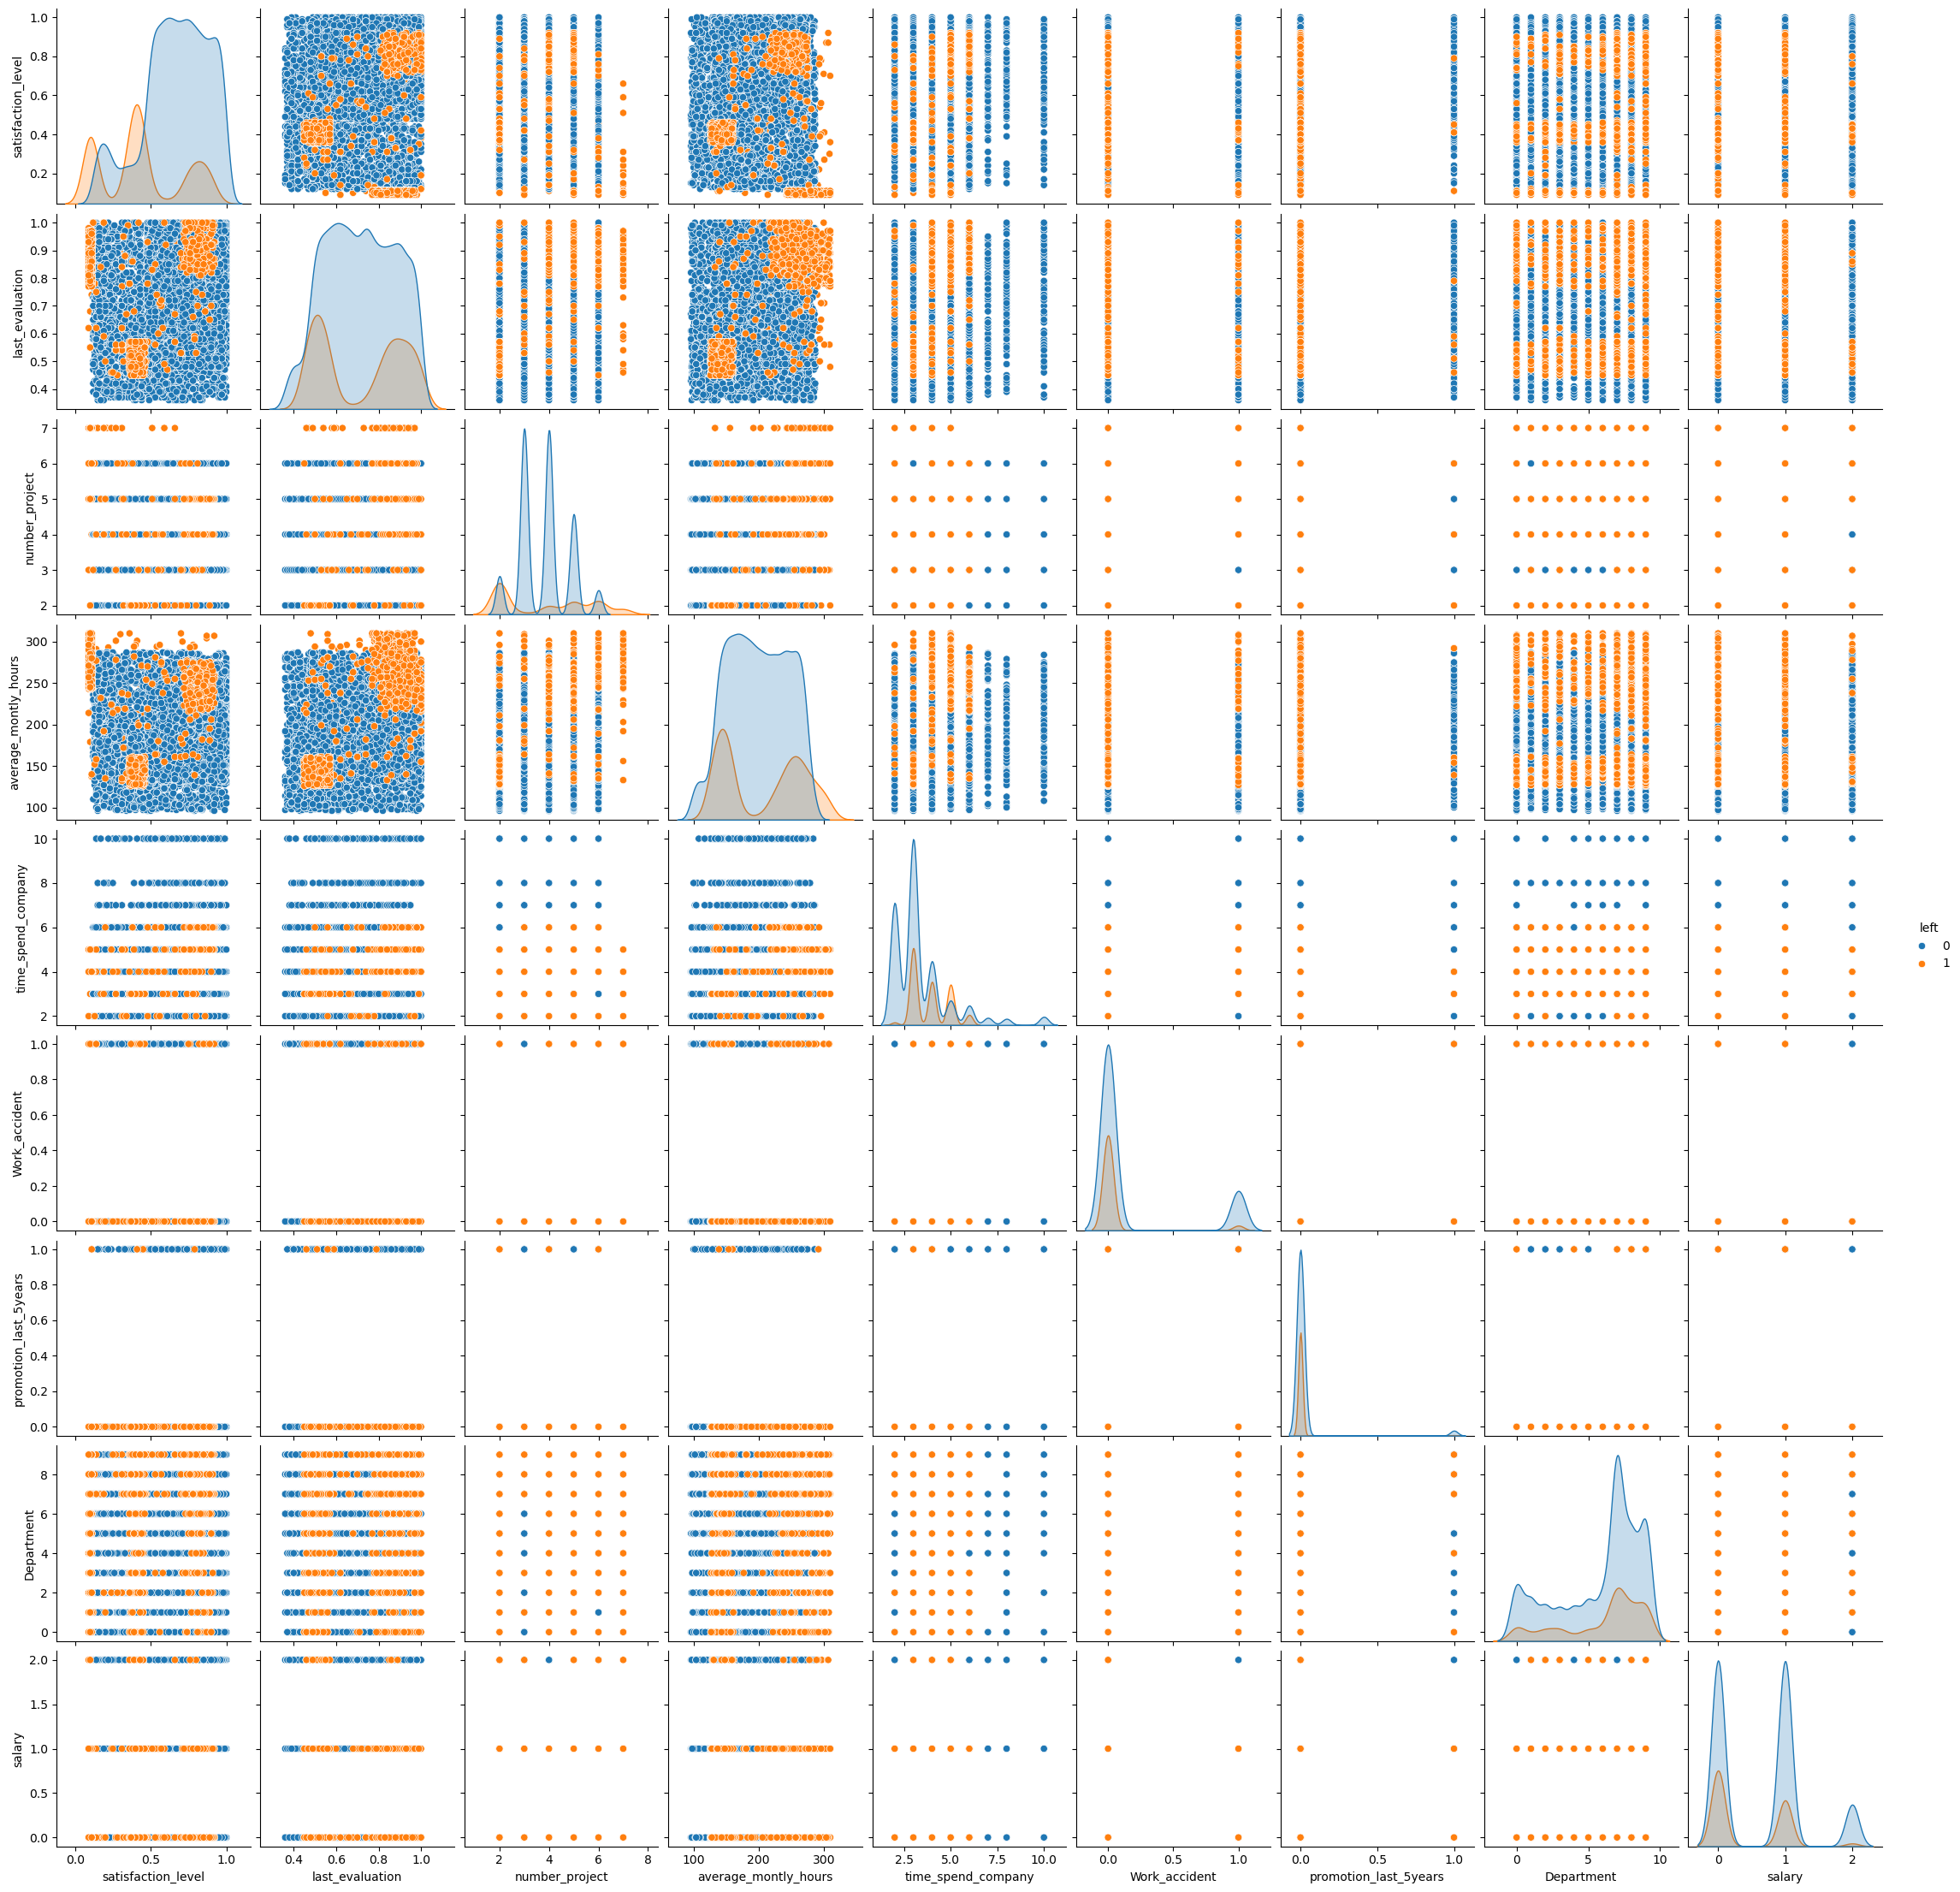

In [75]:
sns.pairplot(data=df,hue='left')

In [76]:
## To check data imbalnced or not
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [77]:
## so here my data has imbalnced data

## Feature importance

## Recursive Feature Elimination (RFE)

In [78]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=rf_model, n_features_to_select=7)
rfe.fit(x_train_scaled, y_train)

# Selected features
print("Selected features:", rfe.support_)

Selected features: [ True  True  True  True  True False False  True  True]


In [79]:
top_5_features_imp=x_train_scaled.columns[rfe.support_]

In [80]:
top_5_features_imp

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Department', 'salary'],
      dtype='object')

In [81]:
list(zip(x_train_scaled.columns,rfe.ranking_))

[('satisfaction_level', 1),
 ('last_evaluation', 1),
 ('number_project', 1),
 ('average_montly_hours', 1),
 ('time_spend_company', 1),
 ('Work_accident', 2),
 ('promotion_last_5years', 3),
 ('Department', 1),
 ('salary', 1)]

In [82]:
X_top7=x_train_scaled[top_5_features_imp]

In [83]:
X_top7

satisfaction_level  last_evaluation  number_project  \
0                1.555391        -0.619346       -0.653412   
1               -1.818394         0.372007        0.156954   
2                0.752109         0.488637       -0.653412   
3                0.189811         0.838527        0.156954   
4               -2.019214         1.246731        2.588050   
...                   ...              ...             ...   
11994           -0.372486         1.421676        0.156954   
11995           -0.492978        -0.386087        0.156954   
11996            0.189811         0.080433        0.967319   
11997            0.711945         1.654936        0.156954   
11998            1.475063         0.838527       -1.463777   

       average_montly_hours  time_spend_company  Department    salary  
0                 -0.260887            0.340617    0.045704 -0.935203  
1                 -0.100652            1.024071    1.092948  2.207635  
2                 -0.521269           -1.026293   -1.699702  0.636216  
3                 -1.783117            1.707526   -1.350621  0.636216  
4                  1.661929            0.340617    1.092948 -0.935203  
...                     ...                 ...         ...       ...  
11994              0.900815           -0.342838    0.743867 -0.935203  
11995              0.640433            2.390981    0.394786  0.636216  
11996              0.960903           -1.026293    0.743867  0.636216  
11997              0.339993            1.024071    0.394786 -0.935203  
11998              0.360022            0.340617    0.394786 -0.935203  

[11999 rows x 7 columns]

## Feature Importance

In [84]:
importances = rf_model.feature_importances_
features = x_train_scaled.columns

# Create a DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


In [85]:
importance_df

Feature  Importance
0     satisfaction_level    0.355563
2         number_project    0.176829
4     time_spend_company    0.173046
3   average_montly_hours    0.152047
1        last_evaluation    0.115353
7             Department    0.012356
8                 salary    0.008866
5          Work_accident    0.004668
6  promotion_last_5years    0.001272

In [86]:
## Top 5 feature imporatnce 
importance_df.head(5)


Feature  Importance
0    satisfaction_level    0.355563
2        number_project    0.176829
4    time_spend_company    0.173046
3  average_montly_hours    0.152047
1       last_evaluation    0.115353

### Hyperparameter Tuning (Random Search )


## PCA 

## Balanced Data

In [87]:
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [89]:
X=data.drop(columns='left')
Y=data['left']

In [90]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X,Y)


In [91]:
y_resampled .value_counts()

left
0    3571
1    3571
Name: count, dtype: int64

In [92]:
new_data=X_resampled.copy()

In [93]:

X_resampled=X_resampled.drop(columns=['Work_accident', 'promotion_last_5years'])


In [94]:
X_resampled.head()

satisfaction_level  last_evaluation  number_project  \
6432                0.25             0.67               2   
2035                0.76             0.60               4   
6420                0.68             0.54               3   
3340                0.86             0.49               4   
8491                0.15             0.66               5   

      average_montly_hours  time_spend_company Department  salary  
6432                   136                   6      sales  medium  
2035                   177                   2    support     low  
6420                   270                   4      sales     low  
3340                   251                   2  technical  medium  
8491                   160                   4      sales  medium

In [95]:
X_resampled['Department'].unique()

array(['sales', 'support', 'technical', 'product_mng', 'marketing', 'hr',
       'RandD', 'IT', 'management', 'accounting'], dtype=object)

In [96]:
X_resampled.shape

(7142, 7)

In [97]:
 y_resampled.shape

(7142,)

In [98]:
##before my data left counts
y.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [99]:
## after balanced data left counts

y_resampled.value_counts()

left
0    3571
1    3571
Name: count, dtype: int64

In [100]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_resampled, y_resampled,test_size=0.20,random_state=42)

## column transform
-- department- label encong
-- salary- orinidal 
-- numrical - saclling

In [101]:


ordinal_cols = ['salary']
ordinal_categories = [['low', 'medium', 'high']]
label_cols = ['Department']
numeric_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
                'average_montly_hours', 'time_spend_company']


In [102]:
# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ord_enc', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
        ('scale_num', StandardScaler(), numeric_cols)
    ]
)


In [103]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()

In [104]:

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # ✅ Correct
])


In [105]:
# Step 4: Fit and evaluate
pipeline.fit(X_train1, y_train1)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ord_enc',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary']),
                                                 ('scale_num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [106]:
y_pred_balanced = pipeline.predict(X_test1)


In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test1, y_pred_balanced ))
print("Precision:", precision_score(y_test1, y_pred_balanced ))
print("Recall:", recall_score(y_test1, y_pred_balanced ))
print("F1 Score:", f1_score(y_test1, y_pred_balanced ))
print("Confusion Matrix:\n", confusion_matrix(y_test1, y_pred_balanced ))


Accuracy: 0.979706088173548
Precision: 0.9969742813918305
Recall: 0.9606413994169096
F1 Score: 0.9784706755753526
Confusion Matrix:
 [[741   2]
 [ 27 659]]


## 📊 Key Metrics Compariso Between Balanced model and Imbalanced Model

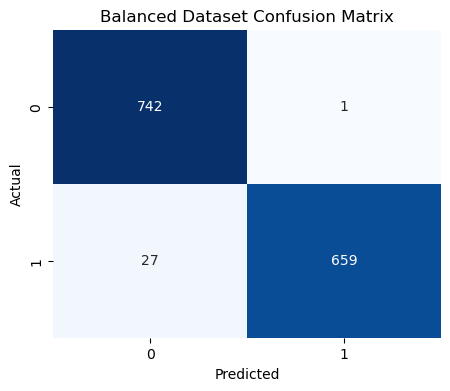

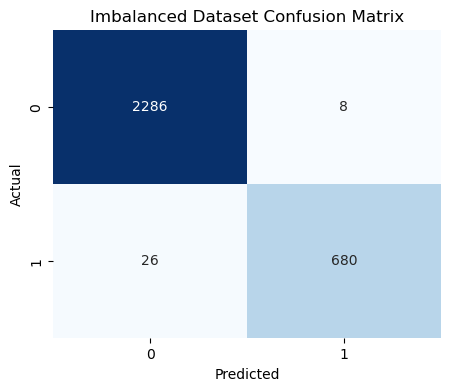

📊 Model Performance Comparison:


Metric Balanced Imbalanced
0   Accuracy   0.9804     0.9887
1  Precision   0.9985     0.9884
2     Recall   0.9606     0.9632
3   F1 Score   0.9792     0.9756

In [108]:
# Imports
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrices
balanced_cm = [[742, 1], [27, 659]]
imbalanced_cm = [[2286, 8], [26, 680]]

# Convert to arrays
import numpy as np
balanced_cm = np.array(balanced_cm)
imbalanced_cm = np.array(imbalanced_cm)

# Plotting function
def plot_confusion(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot both
plot_confusion(balanced_cm, "Balanced Dataset Confusion Matrix")
plot_confusion(imbalanced_cm, "Imbalanced Dataset Confusion Matrix")

# Evaluation metrics (manually calculated or from model)
def evaluate_confusion(cm):
    TN, FP = cm[0]
    FN, TP = cm[1]
    accuracy = (TP + TN) / cm.sum()
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1

# Compare metrics
balanced_metrics = evaluate_confusion(balanced_cm)
imbalanced_metrics = evaluate_confusion(imbalanced_cm)

# Display comparison
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Balanced': [f"{x:.4f}" for x in balanced_metrics],
    'Imbalanced': [f"{x:.4f}" for x in imbalanced_metrics]
})

print("📊 Model Performance Comparison:")
display(comparison)

## 🧠 Final Recommendatio
“Although the imbalanced dataset yielded slightly higher accuracy, I selected the balanced version for final deployment to ensure fair treatment of both classes and avoid bias toward the majority class. This improves generalization and stakeholder trust.
    ”
    
✅ Balanced Dataset is better for:
- Fair treatment of both classes
- Stable precision and recall
- Real-world deployment where minority class matters attrition

- 
❌ Imbalanced Dataset may give higher accuracy but risks bias and poor generalization.

## FINAL CONCLUSION 
After comparing both models using confusion matrices and key metrics:

- The **balanced Random Forest model** shows better performance in terms of **recall, precision, F1 score**, and **lower false negatives**, making it more reliable for detecting the minority class.
- Although the **imbalanced model** has slightly higher overall accuracy, it is biased toward the majority class and less effective at identifying minority class instances.

**Therefore, the balanced model is preferred**, especially when correct classification of the minority class is critical to the business or application domain.

## 🔧 RandomForest  Hyperparameter Tuning

In [118]:
from sklearn.model_selection import RandomizedSearchCV


In [119]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2']
}

# Setup RandomizedSearchCV
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit search
search.fit(X_train1, y_train1)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('ord_enc',
                                                                               OrdinalEncoder(categories=[['low',
                                                                                                           'medium',
                                                                                                           'high']]),
                                                                               ['salary']),
                                                                              ('scale_num',
                                                                               StandardScaler(),
                                                                               ['satisfaction_level',
                                                                                'last_evaluation',
                                                                                'number_project',
                                                                                'average_montly_hours',
                                                                                'time_spend_company'])])),
                                             ('classifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'classifier__max_depth': [None, 10, 20,
                                                                  30],
                                        'classifier__max_features': ['sqrt',
                                                                     'log2'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200,
                                                                     300]},
                   random_state=42, scoring='accuracy', verbose=1)

In [120]:
print("✅ Best Parameters:", search.best_params_)
print("📊 Best CV Accuracy:", round(search.best_score_ * 100, 2), "%")

# Evaluate on test set
best_model = search.best_estimator_
test_accuracy = best_model.score(X_test1, y_test1)
print("🧪 Test Accuracy:", round(test_accuracy * 100, 2), "%")



✅ Best Parameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'log2', 'classifier__max_depth': 30}
📊 Best CV Accuracy: 98.07 %
🧪 Test Accuracy: 97.97 %


In [123]:
 y_pred_balanced1=best_model.predict(X_test1)

In [124]:
print("Confusion Matrix:\n", confusion_matrix(y_test1, y_pred_balanced1))

Confusion Matrix:
 [[741   2]
 [ 27 659]]


In [125]:
print("Accuracy:", accuracy_score(y_test1, y_pred_balanced1 ))

Accuracy: 0.979706088173548


## 🧠 Final Recommendatio


## lets pass data check out put 

In [178]:

input_data = pd.DataFrame([[0.25,0.67,2,136,6,'sales','medium']], columns=X_train1.columns)
                         


In [180]:
# Predict
best_model.predict(input_data)

array([0], dtype=int64)

In [176]:
y_train1[6432]

0

**now its proof  that our model work well

#### ✅ Save the model

In [184]:

import joblib

# Save the pipeline to a file
joblib.dump(best_model, 'rf_pipeline_model.pkl')


['rf_pipeline_model.pkl']

## ✅ Load the model later

In [185]:
# Load the saved pipeline
loaded_pipeline = joblib.load('rf_pipeline_model.pkl')

# Use it for prediction
loaded_pipeline.predict(input_data) 

array([0], dtype=int64)

### 📊 Visualizing Feature Relationships in 2D Space

In [170]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(pca_data)
X_pca.shape


(7142, 2)

In [171]:
pca_data

array([[ 1.        , -1.13332905, -0.24847086, -1.24288305, -1.24950593,
         1.83602099],
       [ 0.        ,  0.77654828, -0.63429823,  0.11465272, -0.49216798,
        -1.24699405],
       [ 0.        ,  0.47695968, -0.96500741, -0.56411516,  1.22569615,
         0.29451347],
       ...,
       [ 0.        , -0.68394615, -1.0201256 , -1.24288305, -1.12020433,
        -0.47624029],
       [ 0.        , -1.6576091 ,  1.34995682,  1.4721885 ,  1.41041272,
         0.29451347],
       [ 0.        , -0.68394615, -1.0752438 , -1.24288305, -0.84312947,
        -0.47624029]])

C:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


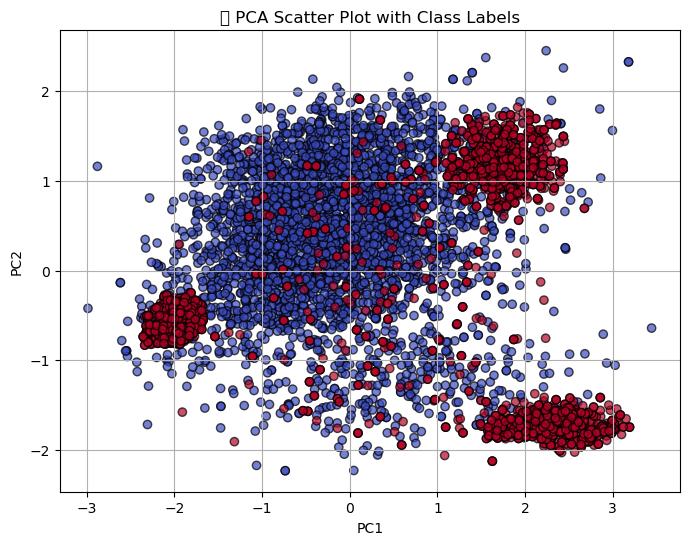

In [172]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= y_resampled, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('🎯 PCA Scatter Plot with Class Labels')
plt.grid(True)
plt.show()


## 📌 
“Principal Component Analysis (PCA) was applied to reduce dimensionality and visualize class separability. The resulting 2D projection revealed distinct clusters between attrition classes, confirming that the dataset contained strong predictive signals and supporting the use of classification models.

## 🧪  Hypothesis Testing — Employee Attrition Analysis on Balanced Data set

In [131]:
import scipy.stats as stats

In [133]:
new_data.head()

satisfaction_level  last_evaluation  number_project  \
6432                0.25             0.67               2   
2035                0.76             0.60               4   
6420                0.68             0.54               3   
3340                0.86             0.49               4   
8491                0.15             0.66               5   

      average_montly_hours  time_spend_company  Work_accident  \
6432                   136                   6              0   
2035                   177                   2              0   
6420                   270                   4              1   
3340                   251                   2              0   
8491                   160                   4              1   

      promotion_last_5years Department  salary  
6432                      0      sales  medium  
2035                      0    support     low  
6420                      0      sales     low  
3340                      0  technical  medium  
8491                      0      sales  medium

In [138]:
new_data=new_data.drop(columns=['Work_accident','promotion_last_5years'],errors='ignore')


In [137]:
new_data.head()

satisfaction_level  last_evaluation  number_project  \
6432                0.25             0.67               2   
2035                0.76             0.60               4   
6420                0.68             0.54               3   
3340                0.86             0.49               4   
8491                0.15             0.66               5   

      average_montly_hours  time_spend_company Department  salary  
6432                   136                   6      sales  medium  
2035                   177                   2    support     low  
6420                   270                   4      sales     low  
3340                   251                   2  technical  medium  
8491                   160                   4      sales  medium

In [140]:

df_combined = pd.concat([new_data,  y_resampled], axis=1)


In [141]:
df_combined .head()

satisfaction_level  last_evaluation  number_project  \
6432                0.25             0.67               2   
2035                0.76             0.60               4   
6420                0.68             0.54               3   
3340                0.86             0.49               4   
8491                0.15             0.66               5   

      average_montly_hours  time_spend_company Department  salary  left  
6432                   136                   6      sales  medium     0  
2035                   177                   2    support     low     0  
6420                   270                   4      sales     low     0  
3340                   251                   2  technical  medium     0  
8491                   160                   4      sales  medium     0

 ## 1️⃣ HYPOTHESIS A: Satisfaction Level vs Attrition

In [142]:
# Split data based on attrition
left = df_combined [df_combined ['left'] == 1]['satisfaction_level']
stayed = df_combined [df_combined ['left'] == 0]['satisfaction_level']

# Perform t-test
t_stat, p_value = stats.ttest_ind(left, stayed, equal_var=False)
print("\n[HYPOTHESIS A] Satisfaction Level vs Attrition")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("✅ Reject Null Hypothesis → Satisfaction significantly impacts attrition.")
else:
    print("❌ Fail to Reject Null Hypothesis → No significant effect.")


[HYPOTHESIS A] Satisfaction Level vs Attrition
T-Statistic: -40.29246037742475
P-Value: 0.0
✅ Reject Null Hypothesis → Satisfaction significantly impacts attrition.


🧠 ***Insight***: Improving job satisfaction could reduce attrition drastically.

 ## 2️⃣ HYPOTHESIS B: Average Monthly Hours vs Attrition

In [143]:
left_hours = df_combined [df_combined ['left'] == 1]['average_montly_hours']
stayed_hours = df_combined [df_combined ['left'] == 0]['average_montly_hours']

t_stat, p_value = stats.ttest_ind(left_hours, stayed_hours, equal_var=False)
print("\n[HYPOTHESIS B] Avg Monthly Hours vs Attrition")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("✅ Reject Null Hypothesis → Work hours differ significantly for attrition cases.")
else:
    print("❌ Fail to Reject Null Hypothesis → No significant difference in work hours.")



[HYPOTHESIS B] Avg Monthly Hours vs Attrition
T-Statistic: 6.050105338312547
P-Value: 1.5268281373862052e-09
✅ Reject Null Hypothesis → Work hours differ significantly for attrition cases.


🧠 **Insight**: Optimize workloads or offer flexible hours to reduce burnout-driven exits.

## 3️⃣ HYPOTHESIS C: Salary Level vs Attrition

In [144]:
# Create a contingency table
salary_table = pd.crosstab(df_combined ['salary'], df_combined ['left'])
chi2, p_value, dof, expected = stats.chi2_contingency(salary_table)

print("\n[HYPOTHESIS C] Salary Level vs Attrition")
print("Chi-Square Statistic:", chi2)
print("P-Value:", p_value)

if p_value < 0.05:
    print("✅ Reject Null Hypothesis → Salary level significantly affects attrition.")
else:
    print("❌ Fail to Reject Null Hypothesis → No significant relationship.")



[HYPOTHESIS C] Salary Level vs Attrition
Chi-Square Statistic: 270.9310849294496
P-Value: 1.4725241276701427e-59
✅ Reject Null Hypothesis → Salary level significantly affects attrition.


🧠 ***Insight***: Low-salary employees are leaving more. Compensation strategy must be revised.

### 🧭 Business Insights Summary

Employee satisfaction is the strongest predictor — invest in engagement programs.

Work-life balance issues (high hours) strongly drive resignations.

Salary structure and career progression are critical retention levers.

Department-wise monitoring (e.g., HR, technical, support) helps identify hotspots of attrition.

